In [64]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/fraud-detection-week-5-and-6
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import src.data.loader as loader
import src.data.preprocessor as preprocessor
from scripts.constants import Fraud_Data_Columns, CLEAN_FRAUD_DATA_FILE_NAME
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data_loader = loader.DataLoader()
raw_fraud_df= data_loader.load_csv() 

Loaded ../data/raw/fraud_data.csv to dataframe!


In [73]:
print("Basic Data Info:")
raw_fraud_df.info()

print("\nStatistical Info:")
print(tabulate(raw_fraud_df.describe(include="all"), headers="keys", tablefmt="grid"))

Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

Statistical Info:
+--------+-----------+---------------------+---------------------+------------------+---------------+----------+-----------+--------+--------------+------------------+----------------+
|      

### Initial Fraud Data Analysis

##### General
1. No Null Values Seen on the data, but futher investigation needed to check for validity

##### Numeric Values
1. Purchase Value
    - Has a mean value of 36.9 and a median(50%) value of 35. This shows the data is slightly right skewed on this feature
2. Age
    - Has a mean value of 33.1 and a median value of 33. This shows the data is symmetrical on this feature

##### Categorical Values 
1. Unique Values 
    - Source has 3 unique values with the most occuring value being SEO
    - Browser has 5 unique values with the most occuring value being Chrome
    - Sex has 2 unique values with the most occuring value being M


In [78]:
# Step 1: Clean Data
data_preprocessor = preprocessor.DataPreProcessor(raw_fraud_df, init_ip=True)
clean_fraud_data = data_preprocessor.get_cleaned_data()

Loaded ../data/raw/ip_to_country.csv to dataframe!
No duplicated rows found.
Converted purchase_time to datetime.
Converted signup_time to datetime.
No generic null values found.
0 transactions with purchase value <= 0 found
0 transactions where sign up date > purchase date values found
0 transactions with age values below 0 or above 100 found
Mapped IP Address to Country!
Data preprocessing complete!


In [79]:
print("Basic Cleaned Data Info:")
clean_fraud_data.info()
print(
    tabulate(clean_fraud_data.head(5), headers="keys", tablefmt="grid")
)

Basic Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  ip_int          151112 non-null  int64         
 12  country         151112 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usa

#### Categoric Values EDA (Univariate)

In [80]:
fraud_df = clean_fraud_data[
    clean_fraud_data[Fraud_Data_Columns.CLASS.value] == 1
].copy()

Most Fraudlent Transaction by Browser


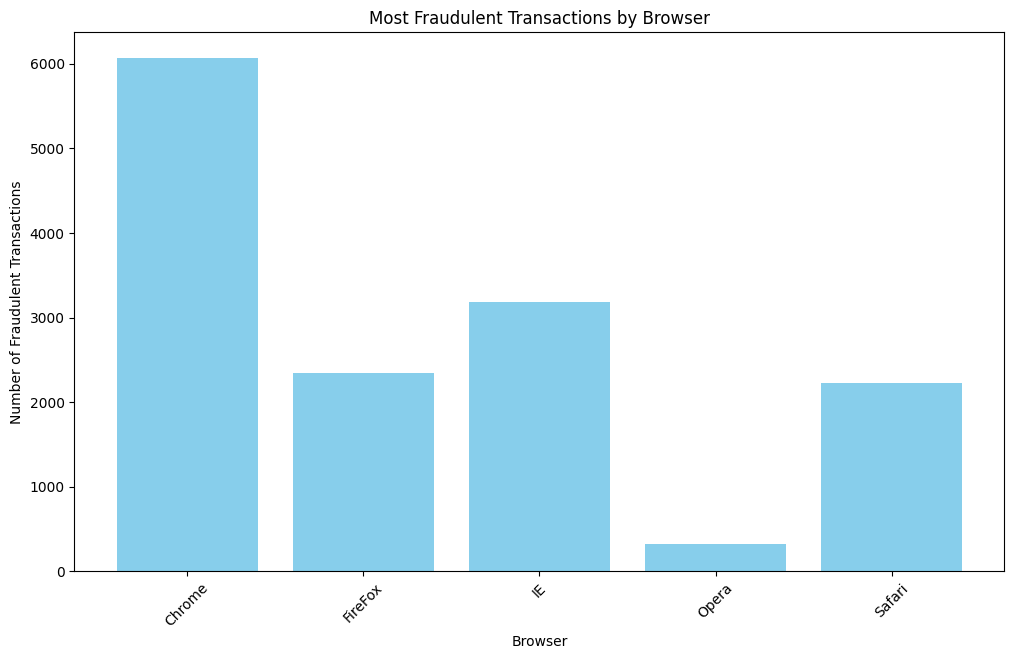

In [81]:
print("Most Fraudlent Transaction by Browser")

fraudulent_browsers = fraud_df.groupby(Fraud_Data_Columns.BROWSER.value)[
    Fraud_Data_Columns.CLASS.value
].sum()

browsers = fraudulent_browsers.index
fraud_counts = fraudulent_browsers.values

plt.figure(figsize=(12, 7))
plt.bar(browsers, fraud_counts, color="skyblue")
plt.xlabel("Browser")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Most Fraudulent Transactions by Browser")
plt.xticks(rotation=45)  
plt.show()

Most Fraudlent Transaction by Source


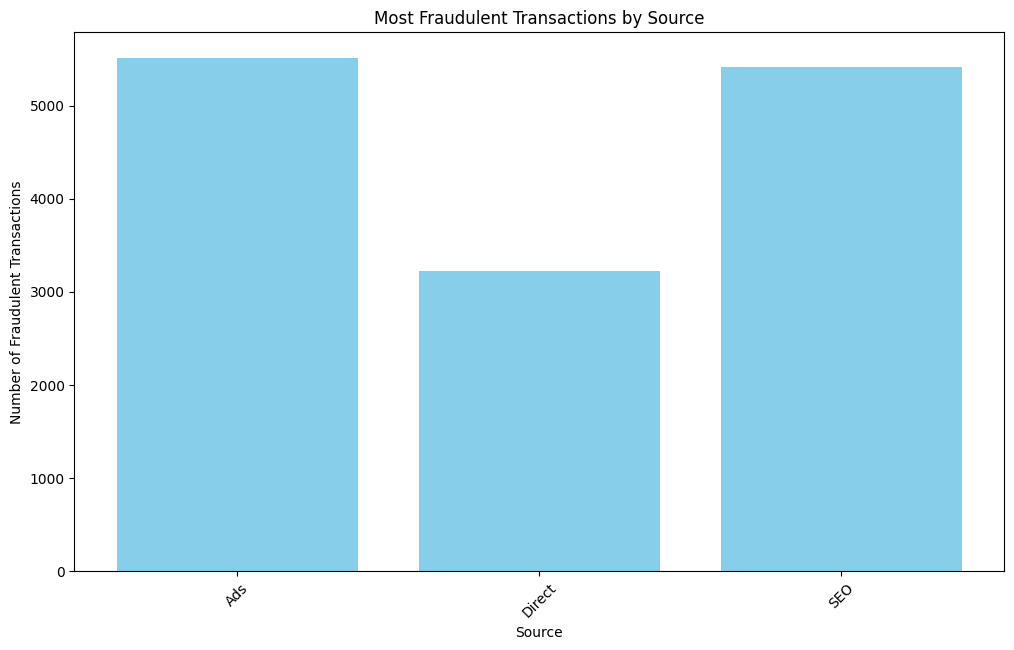

In [82]:
print("Most Fraudlent Transaction by Source")

fraudulent_sources = fraud_df.groupby(Fraud_Data_Columns.SOURCE.value)[
    Fraud_Data_Columns.CLASS.value
].sum()

sources = fraudulent_sources.index
fraud_counts = fraudulent_sources.values

plt.figure(figsize=(12, 7))
plt.bar(sources, fraud_counts, color="skyblue")
plt.xlabel("Source")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Most Fraudulent Transactions by Source")
plt.xticks(rotation=45)
plt.show()

In [87]:
print("Fraud Rate per Country")

fraud_rate_per_country_df = clean_fraud_data.groupby(Fraud_Data_Columns.COUNTRY.value)[Fraud_Data_Columns.CLASS.value].mean().sort_values(ascending=False)
print(fraud_rate_per_country_df.head(10))

Fraud Rate per Country
country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64


In [88]:
print("Transaction Volume per Country")

volume_per_country_df = (
    clean_fraud_data.groupby(Fraud_Data_Columns.COUNTRY.value)
    .size()
    .sort_values(ascending=False)
)
print(volume_per_country_df.head(10))

Transaction Volume per Country
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
dtype: int64


#### Numeric Values EDA (Univariate)

Most Fraudlent Age Category


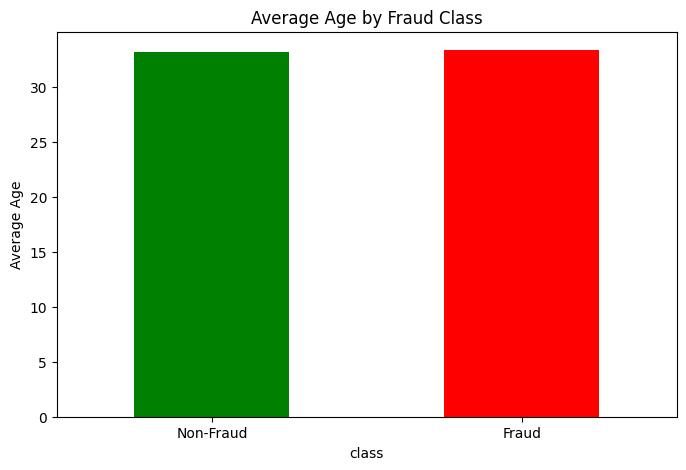

In [110]:
print("Most Fraudlent Age Category")

fraudulent_age = clean_fraud_data.groupby(Fraud_Data_Columns.CLASS.value)[
    Fraud_Data_Columns.AGE.value
].mean()

fraudulent_age.plot(kind="bar", color=["green", "red"], figsize=(8, 5))
plt.xticks([0, 1], ["Non-Fraud", "Fraud"], rotation=0)
plt.ylabel("Average Age")
plt.title("Average Age by Fraud Class")
plt.show()

Months & Days with the most fraudlent transactions


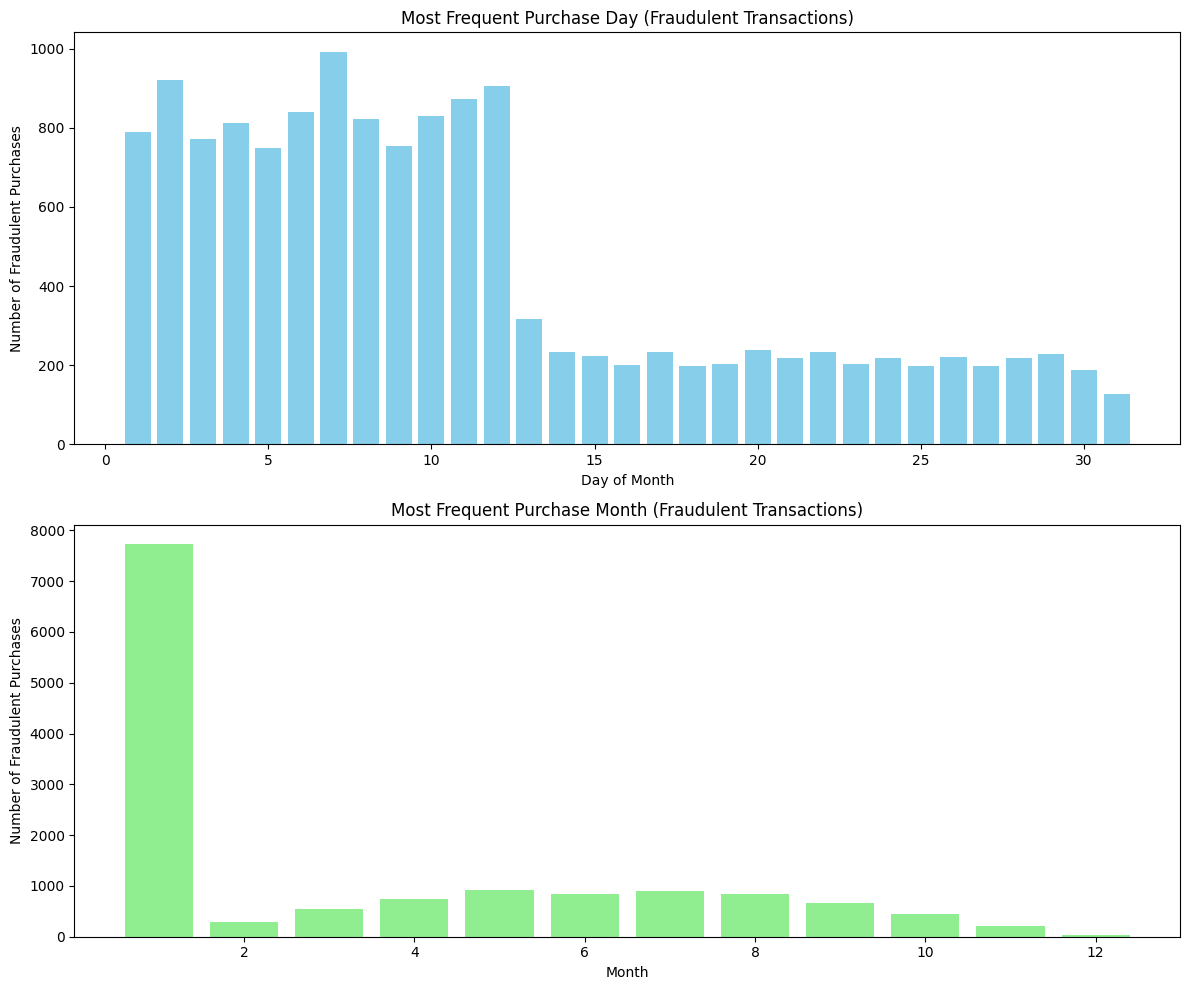

In [ ]:
print("Months & Days with the most fraudlent transactions")

# Extract day and month
fraud_df["purchase_day"] = fraud_df[Fraud_Data_Columns.PURCHASE_TIME.value].dt.day
fraud_df["purchase_month"] = fraud_df[Fraud_Data_Columns.PURCHASE_TIME.value].dt.month

# Count occurrences
day_counts = fraud_df["purchase_day"].value_counts().sort_index()
month_counts = fraud_df["purchase_month"].value_counts().sort_index()

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].bar(day_counts.index, day_counts.values, color="skyblue")
axes[0].set_title("Most Frequent Purchase Day (Fraudulent Transactions)")
axes[0].set_xlabel("Day of Month")
axes[0].set_ylabel("Number of Fraudulent Purchases")

axes[1].bar(month_counts.index, month_counts.values, color="lightgreen")
axes[1].set_title("Most Frequent Purchase Month (Fraudulent Transactions)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Fraudulent Purchases")

plt.tight_layout()
plt.show()

Signup-to-purchase time difference in days
Average signup-to-purchase time for fraudulent users: 27.82 days


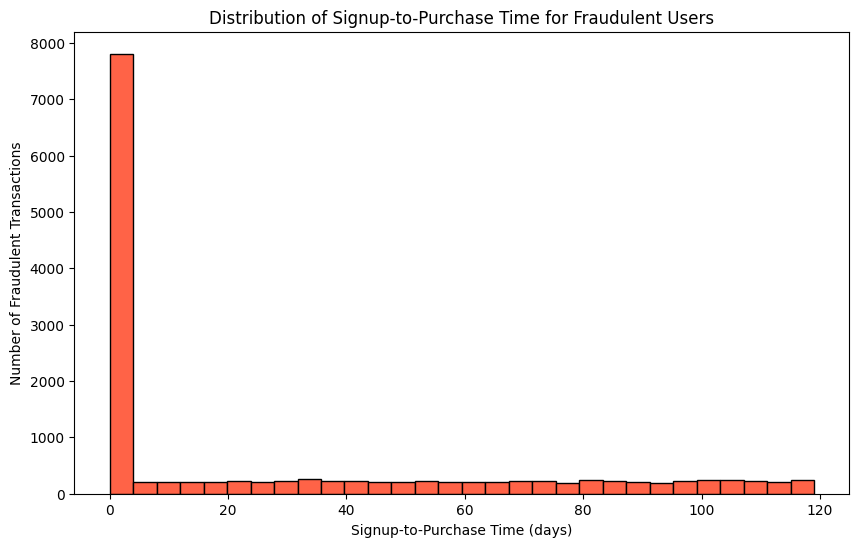

In [122]:
print("Signup-to-purchase time difference in days")

fraud_df["signup_to_purchase_days"] = (
    fraud_df[Fraud_Data_Columns.PURCHASE_TIME.value]
    - fraud_df[Fraud_Data_Columns.SIGN_UP_TIME.value]
).dt.days

avg_days = fraud_df["signup_to_purchase_days"].mean()
print(f"Average signup-to-purchase time for fraudulent users: {avg_days:.2f} days")

plt.figure(figsize=(10, 6))
plt.hist(
    fraud_df["signup_to_purchase_days"], bins=30, color="tomato", edgecolor="black"
)
plt.xlabel("Signup-to-Purchase Time (days)")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Distribution of Signup-to-Purchase Time for Fraudulent Users")
plt.show()

#### Bivariate Analysis

Purchase Value vs Class


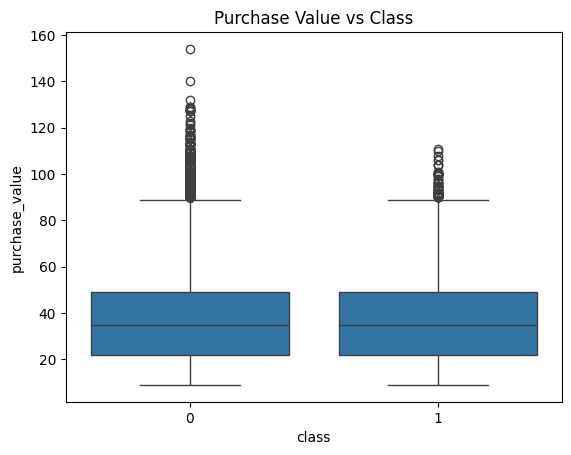

In [94]:
print("Purchase Value vs Class")

sns.boxplot(x="class", y="purchase_value", data=clean_fraud_data)
plt.title("Purchase Value vs Class")
plt.show()

Age vs Class


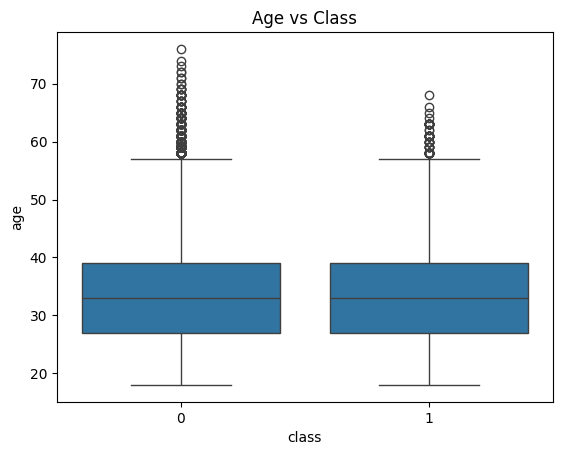

In [95]:
print("Age vs Class")

sns.boxplot(x="class", y="age", data=clean_fraud_data)
plt.title("Age vs Class")
plt.show()

#### Class Imbalance

Fraud vs Non Fraud Transactions


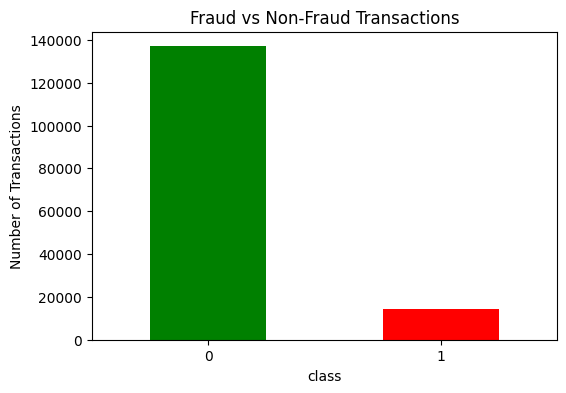

In [ ]:
print("Fraud vs Non Fraud Transactions")

fraud_counts = clean_fraud_data[Fraud_Data_Columns.CLASS.value].value_counts()
print(fraud_counts)

fraud_counts.plot(kind="bar", color=["green", "red"], legend=False, figsize=(6, 4))
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=0)
plt.show()

In [91]:
# Save final data with country col
data_loader.save_csv(clean_fraud_data, file_name=CLEAN_FRAUD_DATA_FILE_NAME)

Saved dataframe to ../data/processed/fraud_data_clean.csv to successfully!
